In [42]:
import glob
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')
sns.set_style('white')#, {'font.family': 'Times New Roman'})
sns.set_context("paper", font_scale=5)

In [43]:
# Prettify
CORPUS_NAME_MAP = {
    'swb': 'Switchboard', 
    'dd': 'DailyDialog',
    'provo': 'Provo',
    'ns': 'Natural Stories',
    'brown': 'Brown',
    'clasp': 'Clasp'
}

MEASURE_NAME_MAP = {
    'mean_surprise': 'Information Value\n(mean)',
    'min_surprise': 'Information Value\n(min)',
    'surprise': 'Information Value',
    'ooc_mean_surprise': 'Out-of-context Information Value\n(mean)',
    'ooc_min_surprise': 'Out-of-context Information Value\n(min)',
    'ooc_surprise': 'Out-of-context Information Value',
    'expected_surprise': 'Expected Information Value',
    'deviation_surprise': 'Deviation in Information Value',
    'context_informativeness': 'Context Informativeness'
}

MEASURE_FORMULA_MAP = {
    'Information Value': '$I(Y=y|X=x)$',
    'Out-of-context Information Value': '$I(Y=y)$',  #'$I(Y=y|X=\epsilon)$',
    'Expected Information Value': '$\mathbb{E}(I(Y| X=x))$',
    'Deviation in Information Value': '$D(Y=y | X=x)$',
    'Context Informativeness': '$C(Y=y ; X=x)$'
}

PLOT_MEASURES = {
    'mean_surprise': 'Information Value\n(mean)',
    'min_surprise': 'Information Value\n(min)',
    'surprise': 'Information Value',
    'ooc_mean_surprise': 'Out-of-context Information Value\n(mean)',
    'ooc_min_surprise': 'Out-of-context Information Value\n(min)',
    'ooc_surprise': 'Out-of-context Information Value',
    'expected_surprise': 'Expected Information Value',
    'deviation_surprise': 'Deviation in Information Value',
    'context_informativeness': 'Context Informativeness'
}

In [44]:
# Get all dataframes
dfs = []
for fp in glob.glob("dataframes/*_measures.csv"):
    with open(fp, 'rb') as file:
        df = pd.read_csv(file, index_col=0)
    
    raw_corpus = fp.split('/')[-1].split('_')[0]
    df['Corpus'] = CORPUS_NAME_MAP[raw_corpus]
    df['Measure'] = df['Measure'].apply(lambda x: MEASURE_NAME_MAP[x]) 
    dfs.append(df)
    
ppo_joint_df = pd.concat(dfs, axis=0, ignore_index=True)

In [45]:
ppo_joint_df[['Measure', 'Corpus', 'Delta Log-Likelihood']]
list(ppo_joint_df[ppo_joint_df.Corpus == 'DailyDialog'].Measure)


['Information Value\n(mean)',
 'Information Value\n(min)',
 'Information Value',
 'Out-of-context Information Value\n(mean)',
 'Out-of-context Information Value\n(min)',
 'Out-of-context Information Value',
 'Expected Information Value',
 'Deviation in Information Value',
 'Context Informativeness']

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_69937/3148410788.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  barchart.set_xticklabels(


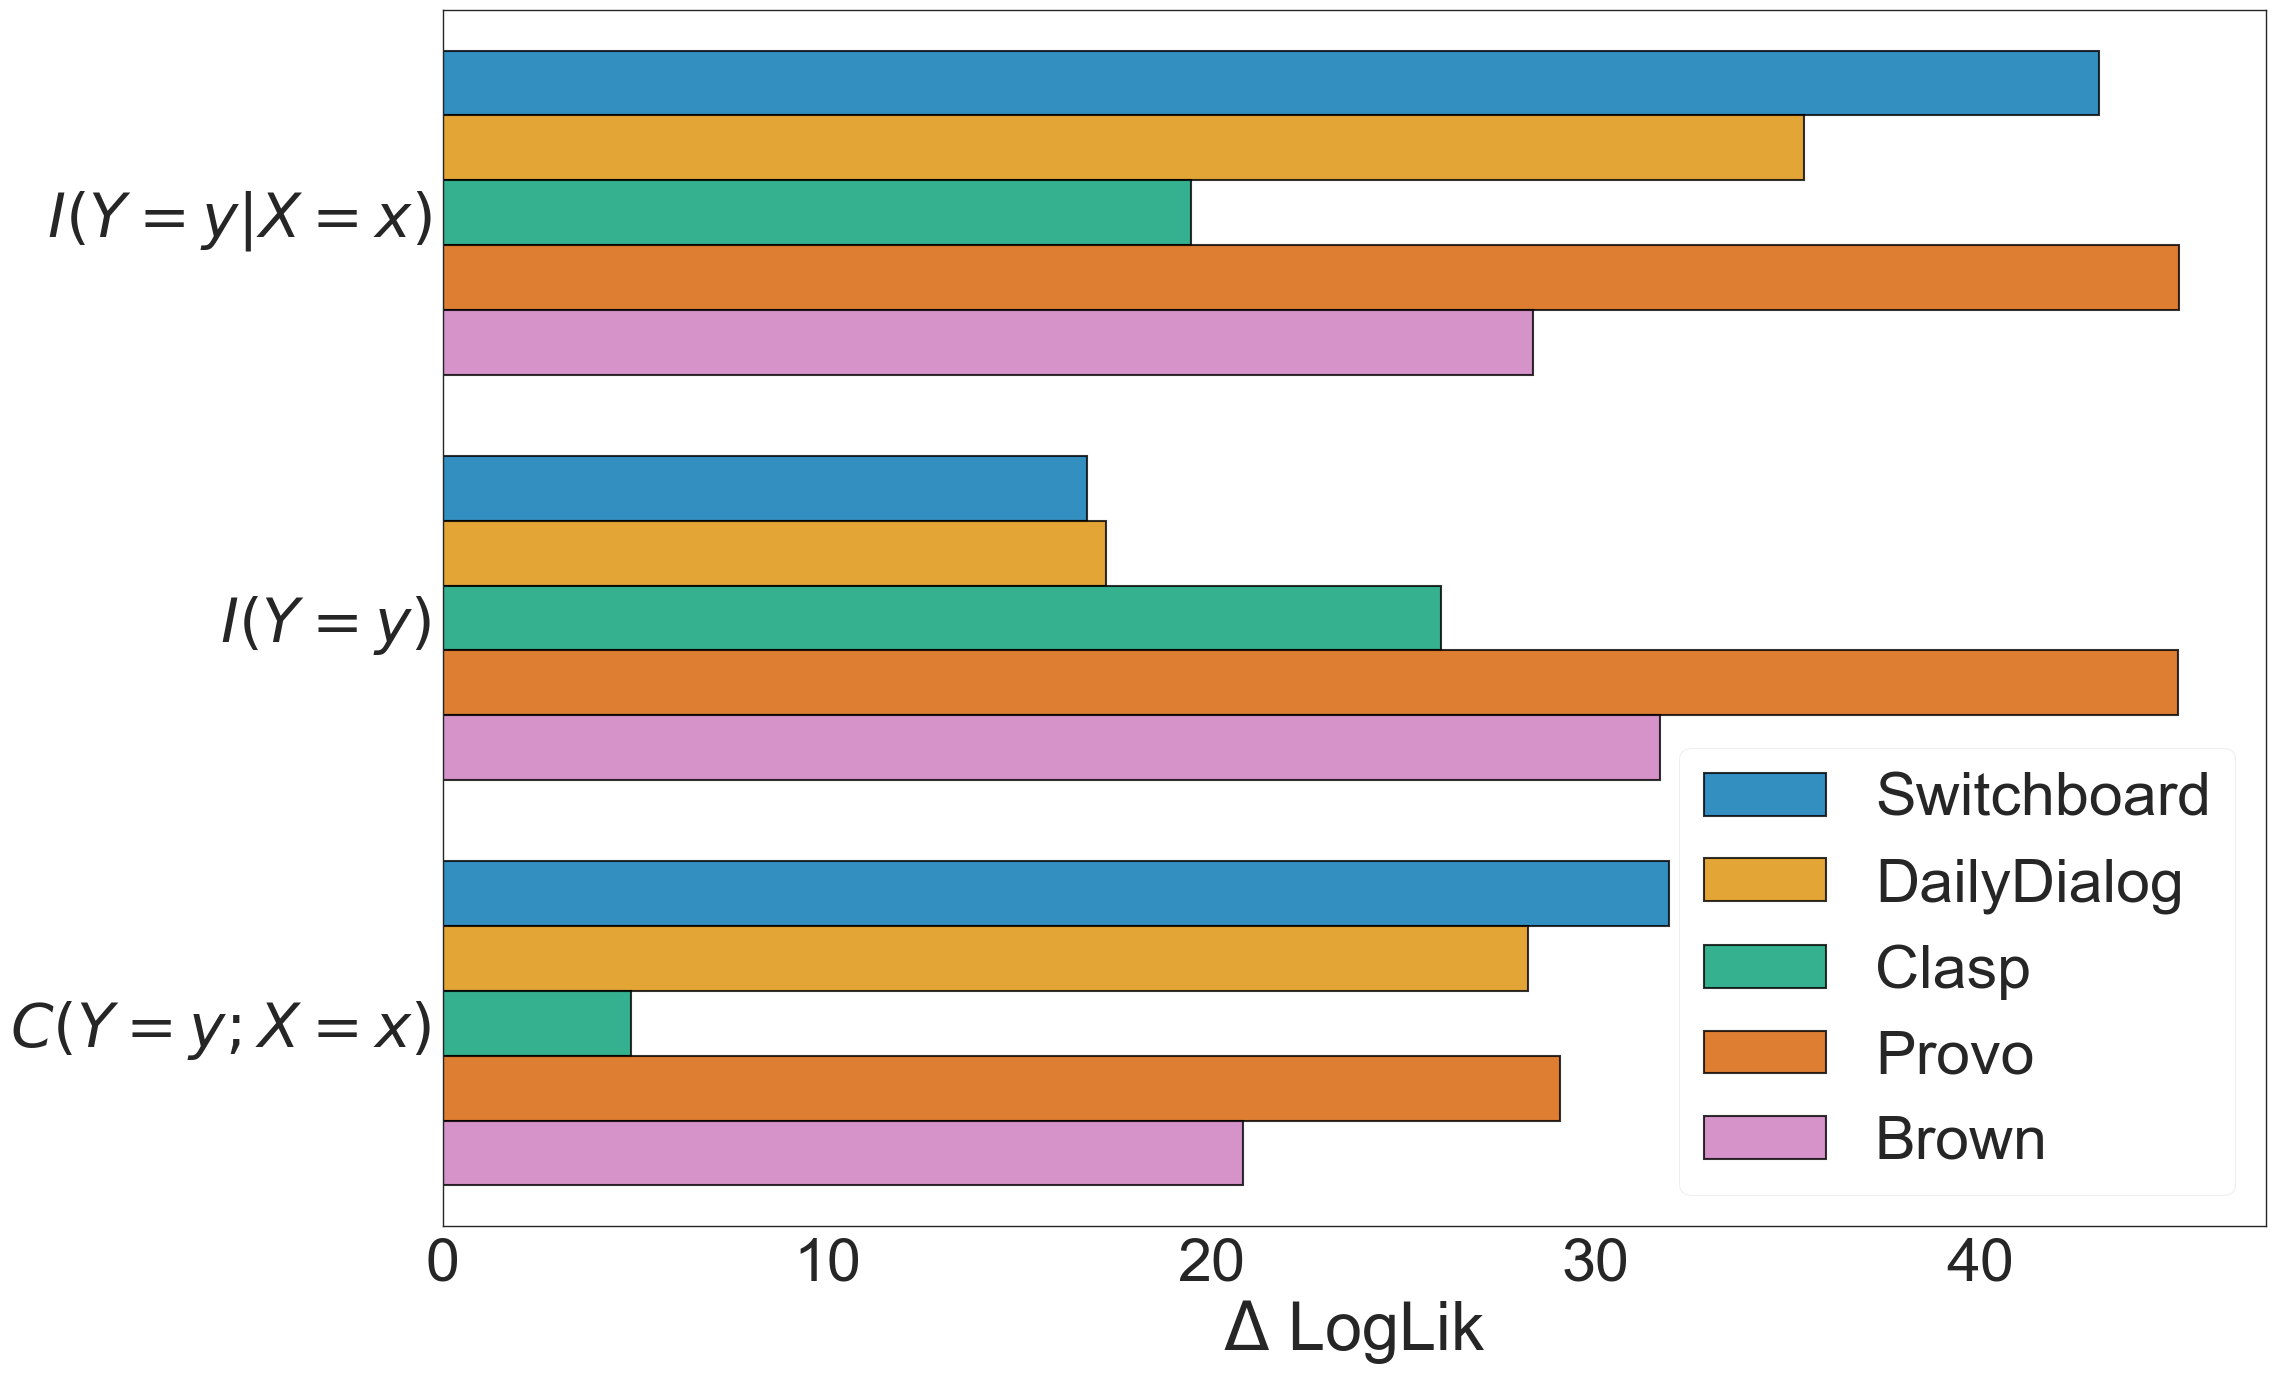

In [46]:
metrics_to_show = ['Information Value',  'Out-of-context Information Value', 'Context Informativeness']  #'Expected Information Value', 'Deviation in Information Value',
# Plot
fig, axes = plt.subplots(1,1,figsize=(24,15))
ax = axes

# make a beautiful barplot for a paper, make it horizontal
barchart = sns.barplot(
    data=ppo_joint_df[ppo_joint_df.Measure.isin(metrics_to_show) & (ppo_joint_df.Corpus != 'Natural Stories')],
    y="Measure",
    x="Delta Log-Likelihood",
    hue="Corpus",
    hue_order=['Switchboard', 'DailyDialog', 'Clasp', 'Provo', 'Brown'],
    ax=ax,
    capsize=0.1,
    palette='colorblind',
    edgecolor='black',
    linewidth=1.5,
    saturation=1,
    dodge=True,
    alpha=0.8,
    # orient='h'
)
barchart.set_xticklabels(
    barchart.get_xticklabels(),            
    rotation=90
)
# ax.set_ylim(0, 50)
ax.set_xlabel("$\Delta$ LogLik")
ax.set_ylabel('')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='best', framealpha=0.3, ncols=1)

# Change names of xticks
yticklabels = [MEASURE_FORMULA_MAP[y.get_text()] for y in ax.get_yticklabels()]
ax.set_yticklabels(yticklabels)

# Rotate xticks
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

plt.tight_layout()
# plt.show()
plt.savefig("../../../figures/derived_measures_reduced", dpi=100, bbox_inches='tight')


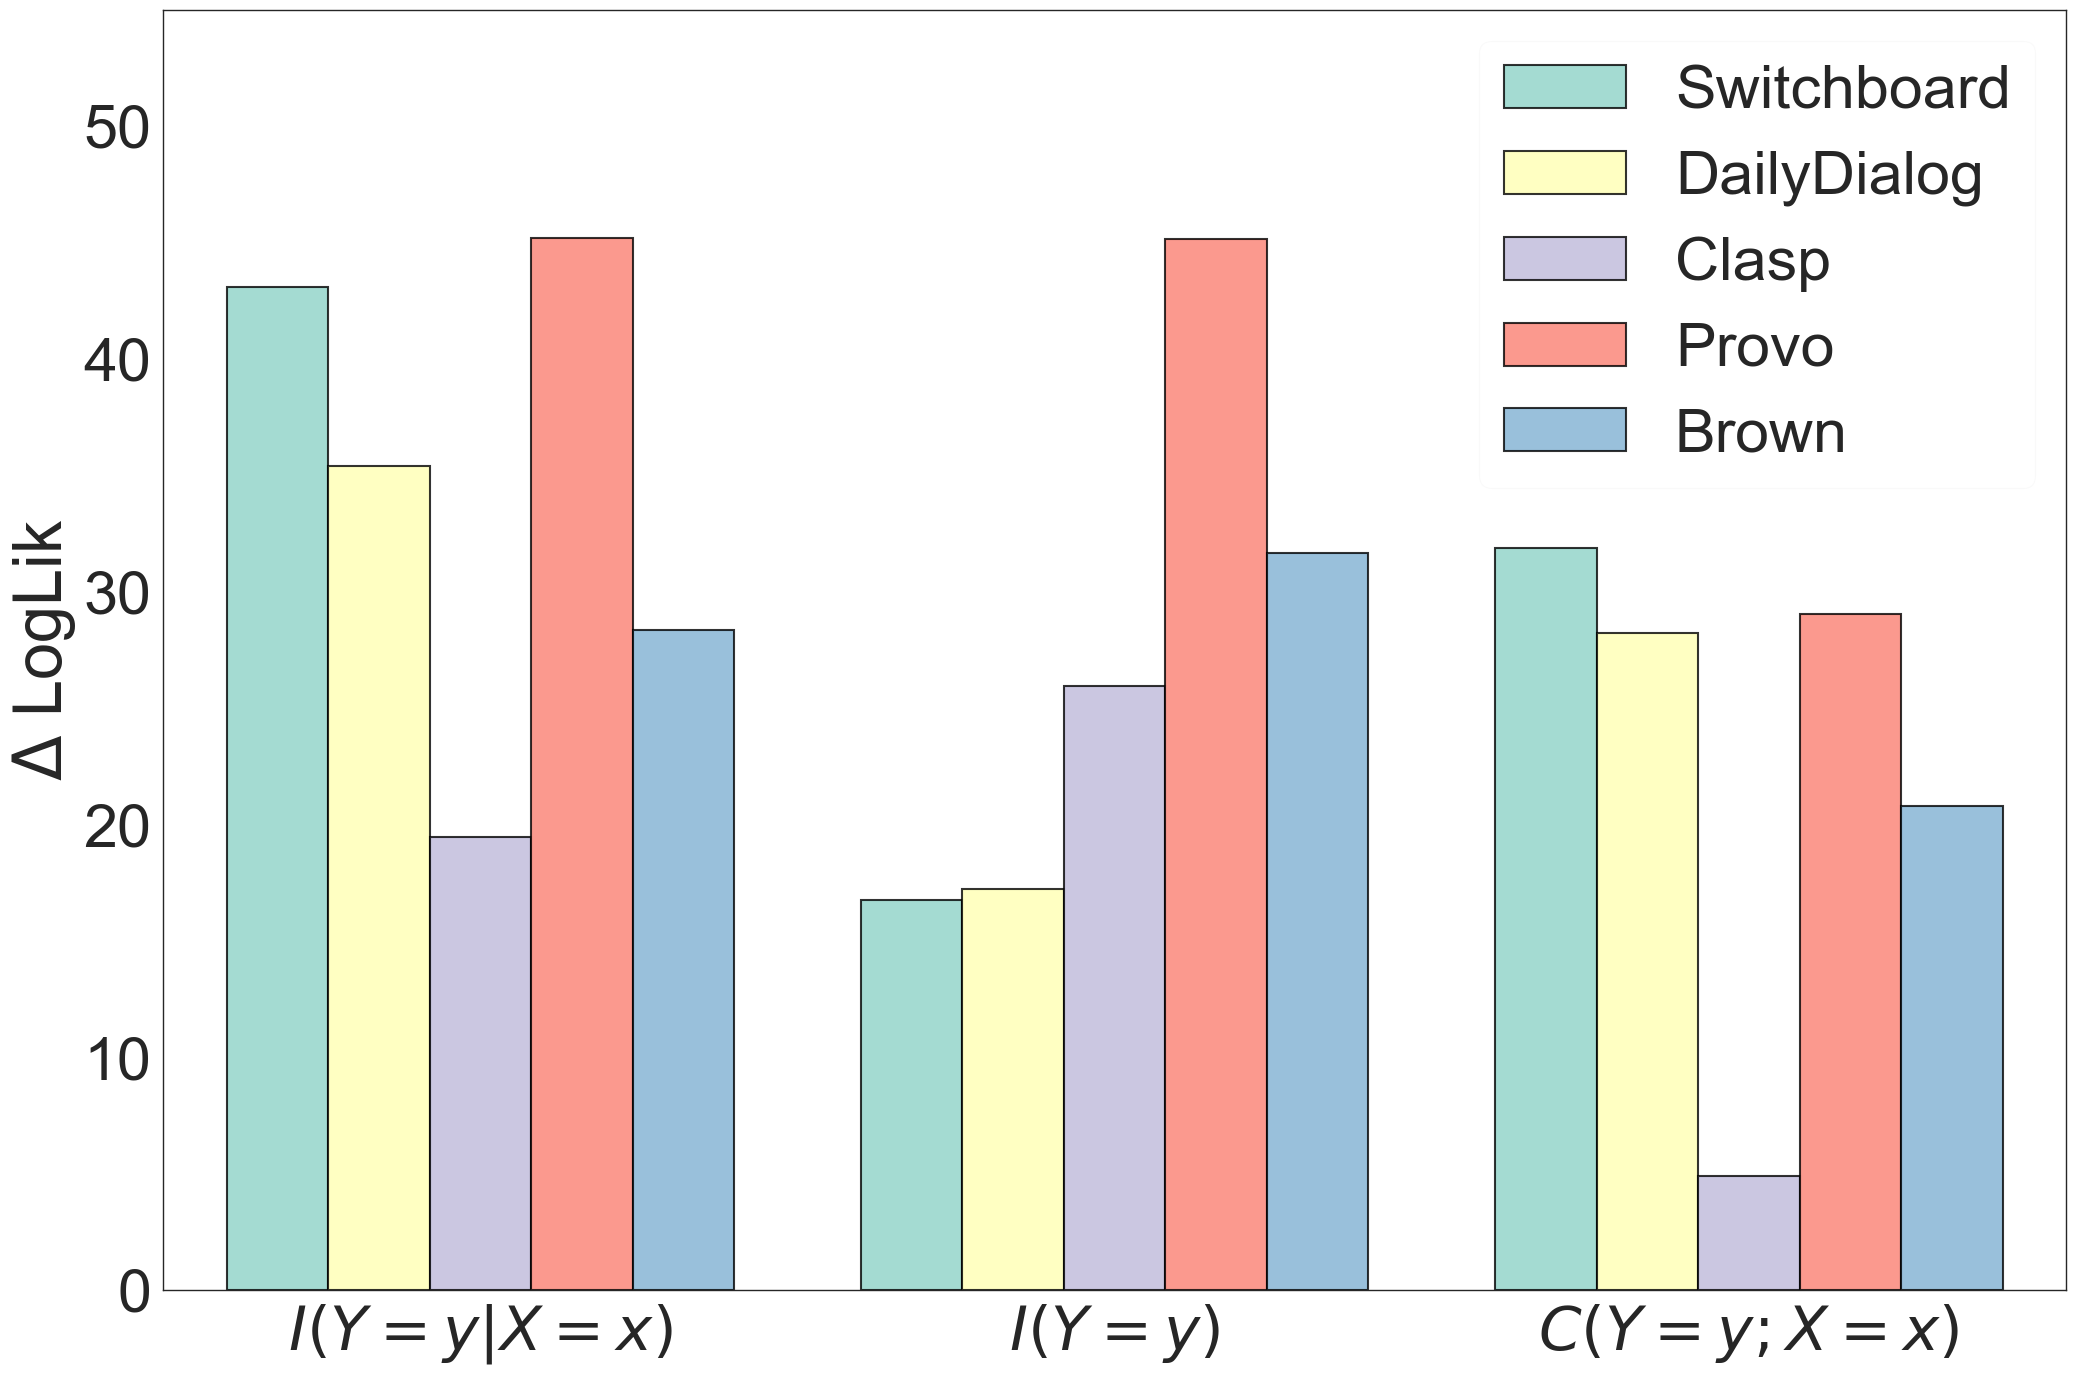

In [47]:
metrics_to_show = ['Information Value',  'Out-of-context Information Value', 'Context Informativeness']  #'Expected Information Value', 'Deviation in Information Value',
# Plot
fig, axes = plt.subplots(1,1,figsize=(22,15))
ax = axes

# make a beautiful barplot for a paper, make it horizontal
barchart = sns.barplot(
    data=ppo_joint_df[ppo_joint_df.Measure.isin(metrics_to_show) & (ppo_joint_df.Corpus != 'Natural Stories')],
    x="Measure",
    y="Delta Log-Likelihood",
    hue="Corpus",
    hue_order=['Switchboard', 'DailyDialog', 'Clasp', 'Provo', 'Brown'],
    ax=ax,
    capsize=0.1,
    palette='Set3',
    edgecolor='black',
    linewidth=1.5,
    saturation=1,
    dodge=True,
    alpha=0.8,
)
barchart.set_xticklabels(
    barchart.get_xticklabels(),
    rotation=90
)
ax.set_ylim(0, 55)
ax.set_ylabel("$\Delta$ LogLik")
ax.set_xlabel('')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, loc='best', framealpha=0.1, ncols=1)

# Change names of xticks
xticklabels = [MEASURE_FORMULA_MAP[x.get_text()] for x in ax.get_xticklabels()]
ax.set_xticklabels(xticklabels)

# Rotate xticks
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

plt.tight_layout()
# plt.show()
plt.savefig("../../../figures/derived_measures_reduced_vertical", dpi=100, bbox_inches='tight')
